# Kushan Script Sites

- Source: https://www.derstandard.de/story/3000000178914/mysterioese-antike-schrift-dank-neuen-rosetta-steins-entziffert

In [77]:
import geopandas as gp
import pandas as pd
from shapely.geometry import shape, Polygon,LineString, MultiPolygon
from shapely.ops import polygonize
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
import utils.osm

world_admin0_raw = gp.read_file("./tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
sites_raw = gp.read_file('./data/greco-bactrian-places.geojson')
regions_raw = gp.read_file('./data/greco-bactrian-kingdom.geojson')
rivers_raw = gp.read_file('./tmp/ne_10m_rivers_lake_centerlines_scale_rank/ne_10m_rivers_lake_centerlines_scale_rank.shp')
urban_raw = gp.read_file('./tmp/ne_10m_urban_areas/ne_10m_urban_areas.shp')
populated_places_raw = gp.read_file('./tmp/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp')
lakes_raw = gp.read_file('./tmp/ne_10m_lakes/ne_10m_lakes.shp')


In [109]:
bounding_box = (55,33,81,44)

world_admin0 = world_admin0_raw.set_crs(epsg=4326)
sites = sites_raw.set_crs(epsg=4326)
regions = regions_raw.set_crs(epsg=4326)
rivers = rivers_raw.set_crs(epsg=4326)
urban = urban_raw.set_crs(epsg=4326)
lakes = lakes_raw.set_crs(epsg=4326)
populated_placed = populated_places_raw.set_crs(epsg=4326)

map_extent = gp.GeoDataFrame(
    data={"geometry": [
        Polygon([
            (bounding_box[0], bounding_box[1]),
            (bounding_box[2], bounding_box[1]),
            (bounding_box[2], bounding_box[3]),
            (bounding_box[0], bounding_box[3]),
		])
	]},
    geometry="geometry",
    crs='EPSG:4326'
)

map_extent.to_file("./tmp/map_extent.geojson")

<Axes: title={'center': 'Kushan script sites'}>

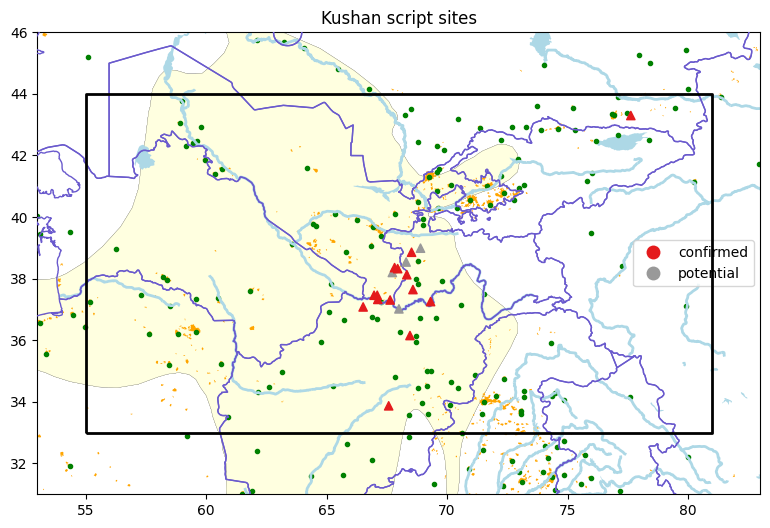

In [110]:
# Plot

fig, ax = plt.subplots(figsize=(12,6))
plt.title("Kushan script sites")

ax.set_xlim(bounding_box[0] -2, bounding_box[2] + 2)
ax.set_ylim(bounding_box[1] -2, bounding_box[3] + 2)

world_admin0.plot(ax=ax, color="none", edgecolor="slateblue", zorder=10)
regions.plot(ax=ax, color="lightyellow", edgecolor="black", lw=.1, zorder=-10)
sites.plot(ax=ax, column="type", cmap="Set1",marker="^", legend=True, zorder=20)
urban.plot(ax=ax, color="orange")
rivers.plot(ax=ax, color='lightblue', lw=2)
lakes.plot(ax=ax, color="lightblue")
populated_placed.plot(ax=ax, marker=".", color='green')
map_extent.plot(ax=ax, color='none', edgecolor="black", lw=2, zorder=100)
